# gfabase for pangenome reference graphs

This notebook demonstrates using gfabase with a reference graph of [Human Pangenome Project data](https://github.com/human-pangenomics/hpgp-data), generated by [minigraph](https://github.com/lh3/minigraph) in its [rGFA flavor](https://github.com/lh3/gfatools/blob/master/doc/rGFA.md) of [GFA1](https://github.com/GFA-spec/GFA-spec). This builds on the [assembly navigation](gfabaseAssemblyNavigation.ipynb) notebook, assuming we already have the `gfabase` tool and its prerequisites, as well as `Bandage`.

**Downloading the compressed rGFA file and importing to gfab:**

In [1]:
%%bash
aria2c -c -q -s 16 -x 16 --retry-wait 2 \
    ftp://ftp.dfci.harvard.edu/pub/hli/minigraph/HPP/var50/GRCh38-freeze1-L50.gfa.gz
gunzip -c GRCh38-freeze1-L50.gfa.gz | ./gfabase --verbose load -o GRCh38-freeze1-L50.gfab
ls -lh GRCh38-freeze1-L50.gfa*

-rw-r--r--  1 mlin  staff   808M Jan 20 16:23 GRCh38-freeze1-L50.gfa.gz
-rw-r--r--  1 mlin  staff   771M Jan 20 20:29 GRCh38-freeze1-L50.gfab


[DEBUG][0.0s] deleting if present: GRCh38-freeze1-L50.gfab
[DEBUG][0.4s] created GFA1 tables
[DEBUG][0.4s] processing GFA1 records...
[INFO][22.4s] processed 1061523 GFA1 record(s)
[DEBUG][22.4s] writing segment metadata...
[DEBUG][23.0s] insertions complete
[INFO][23.0s] indexing...
[DEBUG][23.0s] 	CREATE UNIQUE INDEX gfa1_segment_name ...
[DEBUG][23.1s] 	CREATE INDEX gfa1_segment_mapping_segment ...
[DEBUG][23.2s] 	CREATE INDEX gfa1_link_from_to ...
[DEBUG][23.4s] 	CREATE INDEX gfa1_link_to_from ...
[DEBUG][23.7s] 	CREATE INDEX gfa1_containment_container_contained ...
[DEBUG][23.7s] 	CREATE INDEX gfa1_containment_contained_container ...
[DEBUG][23.7s] 	CREATE UNIQUE INDEX gfa1_path_name ...
[DEBUG][23.7s] 	CREATE INDEX gfa1_path_segment ...
[DEBUG][23.7s] 	indexing segment mappings by genomic range ...
[DEBUG][24.2s] 	indexing graph connectivity ...
[DEBUG][27.1s] 	ANALYZE ...
[DEBUG][28.8s] flushing GRCh38-freeze1-L50.gfab ...
[DEBUG][38.4s] tables & row counts:
[DEBUG][38.4s] 	gfa1

The import takes less than a minute and the .gfab file is actually a bit smaller than the .gfa.gz, despite being indexed every which way. (They can get unwieldy for vg-style graphs, which use >100-fold more segments & links to model all SNPs; pressing for specialized [succinct graph encodings](https://github.com/vgteam/odgi).)

## Visualizing structural variation

The rGFA graph includes linear origin coordinates for each segment, which `gfabase` indexes automatically (`SN:Z`, `SO:i`, and `LN:i` tags). Thus we can go surfing without delay:

In [2]:
%%bash
./gfabase sub GRCh38-freeze1-L50.gfab -o HPP-HLA.gfa chr6:29,885,000-29,900,000 --range --cutpoints 1 --bandage

[INFO][0.1s] Bandage load HPP-HLA.gfa --draw


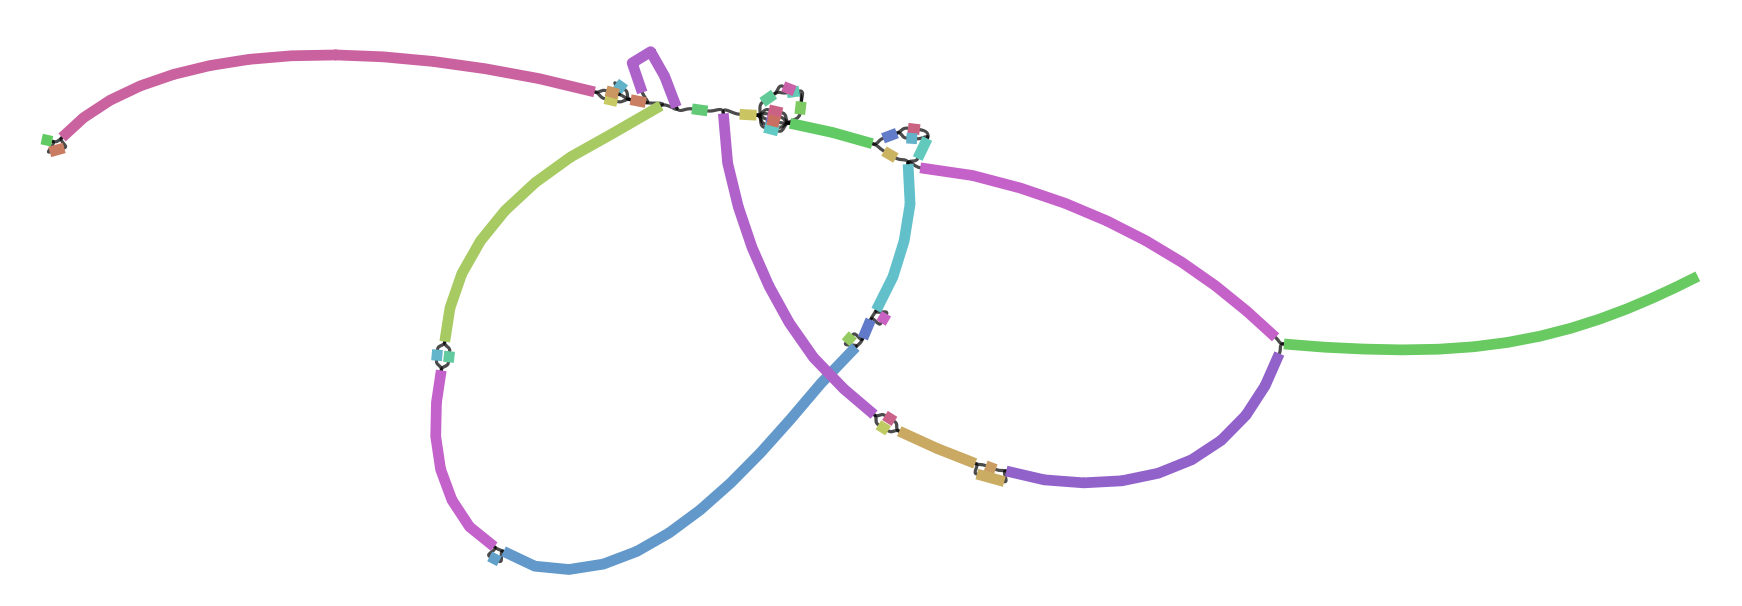

In [3]:
%%bash
./gfabase sub GRCh38-freeze1-L50.gfab -o HPP-CR1.gfa chr1:207,525,000-207,575,000 --range --cutpoints 1 --bandage

[INFO][0.1s] Bandage load HPP-CR1.gfa --draw


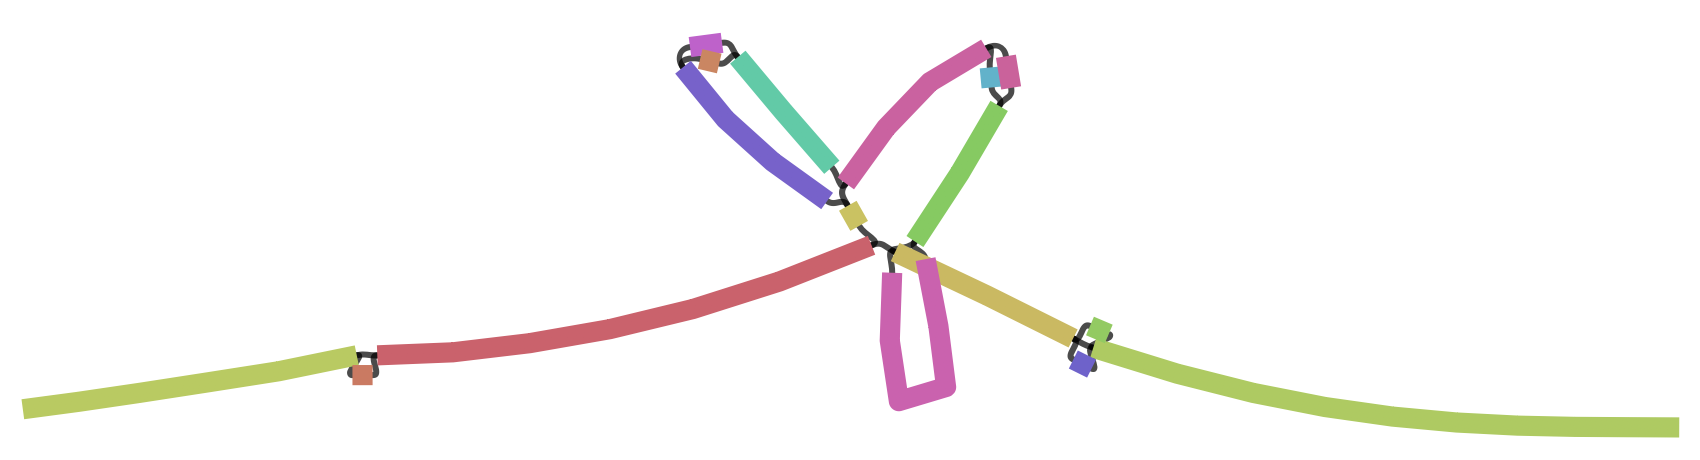

In [4]:
%%bash
./gfabase sub GRCh38-freeze1-L50.gfab -o HPP-RHD.gfa chr1:25,272,509-25,330,445 --range --cutpoints 1 --bandage

[INFO][0.3s] Bandage load HPP-RHD.gfa --draw


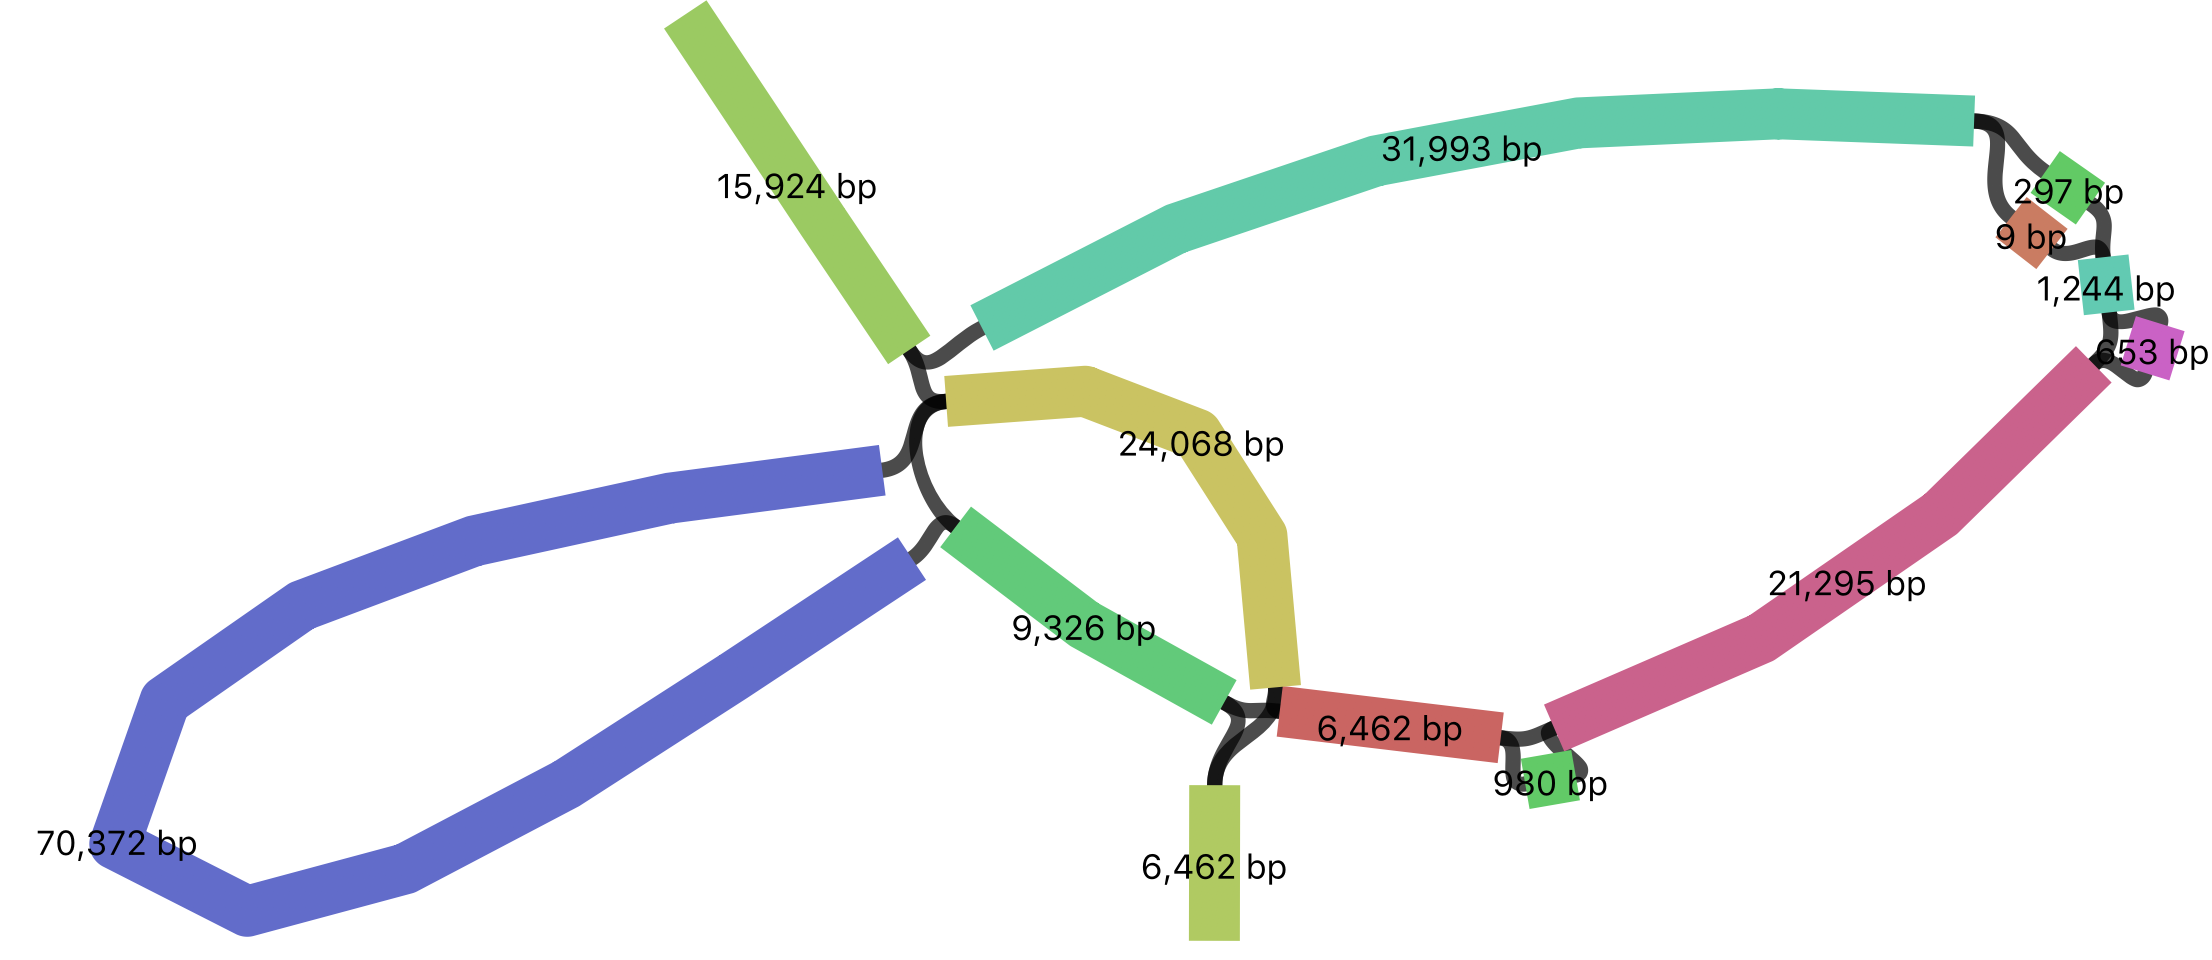

In [5]:
%%bash
./gfabase sub GRCh38-freeze1-L50.gfab chr1:25,272,509-25,330,445 --range --cutpoints 1 --view --no-sequences

H	PG:Z:gfabase-v0.4.0-pre.0
S	2926	*	LN:i:15924	SN:Z:chr1	SO:i:25252101	SR:i:0
S	2927	*	LN:i:31993	SN:Z:chr1	SO:i:25268025	SR:i:0
S	2928	*	LN:i:9	SN:Z:chr1	SO:i:25300018	SR:i:0
S	2929	*	LN:i:1244	SN:Z:chr1	SO:i:25300027	SR:i:0
S	2930	*	LN:i:21295	SN:Z:chr1	SO:i:25301271	SR:i:0
S	2931	*	LN:i:6462	SN:Z:chr1	SO:i:25322566	SR:i:0
S	2932	*	LN:i:9326	SN:Z:chr1	SO:i:25329028	SR:i:0
S	2933	*	LN:i:24068	SN:Z:chr1	SO:i:25338354	SR:i:0
S	2934	*	LN:i:6462	SN:Z:chr1	SO:i:25362422	SR:i:0
S	299675	*	LN:i:70372	SN:Z:HG01106#1#h1tg000028l	SO:i:15303414	SR:i:15
S	357829	*	LN:i:980	SN:Z:HG02145#2#h2tg000043l	SO:i:50663981	SR:i:42
S	357830	*	LN:i:653	SN:Z:HG02145#2#h2tg000043l	SO:i:50686238	SR:i:42
S	357831	*	LN:i:297	SN:Z:HG02145#2#h2tg000043l	SO:i:50688147	SR:i:42
L	2926	+	2927	+	0M	SR:i:0	L1:i:15924	L2:i:31993
L	2926	+	2933	+	0M	SR:i:10	L1:i:15924	L2:i:24068
L	2927	+	2928	+	0M	SR:i:0	L1:i:31993	L2:i:9
L	2928	+	2929	+	0M	SR:i:0	L1:i:9	L2:i:1244
L	2929	+	2930	+	0M	SR:i:0	L1:i:1244	L2:i:21295
L	2929	-	357

These queries are all ~instantaneous to an interactive user.